In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('IOT-temp.csv')
df

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


### Check for duplicate rows

In [2]:
df[df.duplicated()]

,id,room_id/id,noted_date,temp,out/in
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
print(df['room_id/id'].unique())
print(df['out/in'].unique())

['Room Admin']
['In' 'Out']


### Drop unnecessary columns

In [5]:
cols_drop = ['id', 'room_id/id']
df = df.drop(cols_drop, axis=1)
df

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


### Check for null data

In [6]:
df.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

### Check for outlier data 

In [7]:
q1,q3 = np.percentile(df['temp'], [25,75])

print(q1,q3)

30.0 40.0


In [8]:
iqr = q3-q1

print('IQR : {}'.format(iqr))

IQR : 10.0


In [9]:
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print('Lower : {:.2f} \nUpper : {:.2f}'.format(lower,upper))

Lower : 15.00 
Upper : 55.00


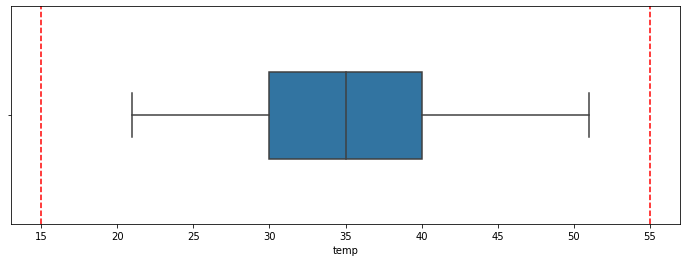

In [10]:
plt.rcParams["figure.figsize"] = (12,4)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(x=df.temp, width=0.4)
plt.show()

### Change object to datetime

In [11]:
df['noted_date'] = pd.to_datetime(df['noted_date'], format = '%d-%m-%Y %H:%M')

In [12]:
df.dtypes

noted_date    datetime64[ns]
temp                   int64
out/in                object
dtype: object

### Make time and date easier to read and understand

In [13]:
df['time'] = df.noted_date.dt.strftime('%H:%M')
df['month'] = df.noted_date.dt.month
df['day'] = df.noted_date.dt.day_name()
df['date'] = df.noted_date.dt.strftime('%d-%m-%Y')
df

,noted_date,temp,out/in,time,month,day,date
0,2018-12-08 09:30:00,29,In,09:30,12,Saturday,08-12-2018
1,2018-12-08 09:30:00,29,In,09:30,12,Saturday,08-12-2018
2,2018-12-08 09:29:00,41,Out,09:29,12,Saturday,08-12-2018
3,2018-12-08 09:29:00,41,Out,09:29,12,Saturday,08-12-2018
4,2018-12-08 09:29:00,31,In,09:29,12,Saturday,08-12-2018
...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,07:07,7,Saturday,28-07-2018
97602,2018-07-28 07:07:00,31,In,07:07,7,Saturday,28-07-2018
97603,2018-07-28 07:06:00,31,In,07:06,7,Saturday,28-07-2018
97604,2018-07-28 07:06:00,31,In,07:06,7,Saturday,28-07-2018


In [14]:
def seasons(x):
    if x in [12, 1, 2]:
        season = 'Winter'
    elif x in [3, 4, 5]:
        season = 'Summer'
    elif x in [6, 7, 8, 9]:
        season = 'Monsoon'
    elif x in [10, 11]:
        season = 'Autumn'
    return season

In [15]:
df['season'] = df['month'].apply(seasons)

In [16]:
df['Day/Night'] = df['time'].apply(lambda x: 'Day' if (x>='06:00') & (x<='18:00') else 'Night')
df[df['Day/Night'] == 'Night']

,noted_date,temp,out/in,time,month,day,date,season,Day/Night
214,2018-12-08 05:59:00,39,Out,05:59,12,Saturday,08-12-2018,Winter,Night
215,2018-12-08 05:59:00,29,In,05:59,12,Saturday,08-12-2018,Winter,Night
216,2018-12-08 05:59:00,39,Out,05:59,12,Saturday,08-12-2018,Winter,Night
217,2018-12-08 05:59:00,29,In,05:59,12,Saturday,08-12-2018,Winter,Night
218,2018-12-08 05:57:00,38,Out,05:57,12,Saturday,08-12-2018,Winter,Night
...,...,...,...,...,...,...,...,...,...
97513,2018-07-29 04:19:00,31,Out,04:19,7,Sunday,29-07-2018,Monsoon,Night
97514,2018-07-29 04:19:00,31,Out,04:19,7,Sunday,29-07-2018,Monsoon,Night
97515,2018-07-29 04:19:00,31,Out,04:19,7,Sunday,29-07-2018,Monsoon,Night
97516,2018-07-29 04:19:00,31,Out,04:19,7,Sunday,29-07-2018,Monsoon,Night


In [17]:
df.sort_values('noted_date', inplace = True)

In [18]:
df.set_index('date', inplace=True)

In [19]:
df.drop('noted_date', axis=1, inplace=True)
df

,temp,out/in,time,month,day,season,Day/Night
date,,,,,,,
28-07-2018,31,In,07:06,7,Saturday,Monsoon,Day
28-07-2018,31,In,07:06,7,Saturday,Monsoon,Day
28-07-2018,31,In,07:06,7,Saturday,Monsoon,Day
28-07-2018,31,In,07:07,7,Saturday,Monsoon,Day
28-07-2018,31,In,07:07,7,Saturday,Monsoon,Day
...,...,...,...,...,...,...,...
08-12-2018,31,In,09:29,12,Saturday,Winter,Day
08-12-2018,41,Out,09:29,12,Saturday,Winter,Day
08-12-2018,41,Out,09:29,12,Saturday,Winter,Day


### Export for EDA process and Visualization

In [20]:
df.to_csv('IOT-temp_Done.csv')

### Little explore through our data

<AxesSubplot:title={'center':'Average Temperature Between Day And Night In Differnt Seasons'}, ylabel='season,Day/Night'>

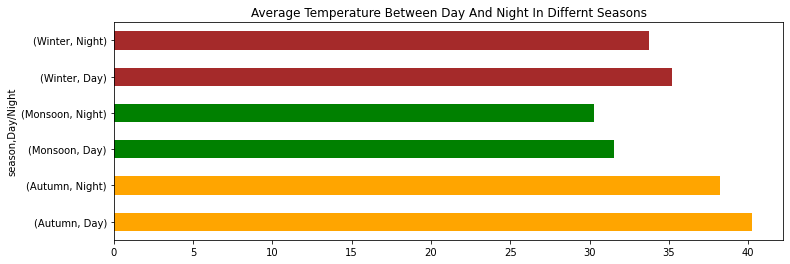

In [21]:
plt.title('Average Temperature Between Day And Night In Differnt Seasons')
df.groupby(['season','Day/Night'])['temp'].mean().plot(kind='barh', color=['orange','orange','g','g','brown','brown'])

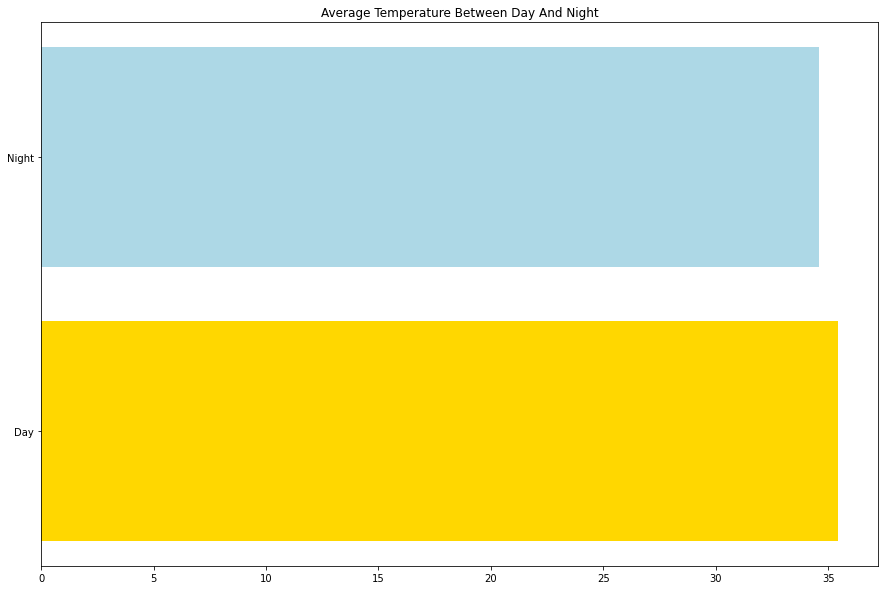

In [22]:
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Average Temperature Between Day And Night')
plt.barh( df['Day/Night'].unique(), df.groupby('Day/Night')['temp'].mean(), color = ['gold','lightblue'])
plt.show()

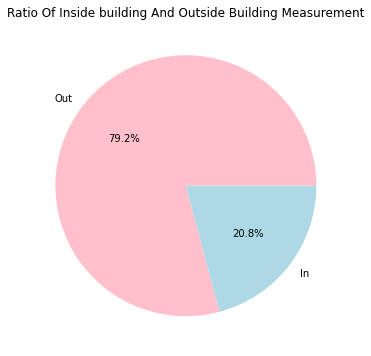

In [23]:
plt.rcParams["figure.figsize"] = (6,6)
plt.title('Ratio Of Inside building And Outside Building Measurement')
plt.pie(df['out/in'].value_counts(), labels=['Out','In'], autopct='%.1f%%', colors=['pink','lightblue'])
plt.show()

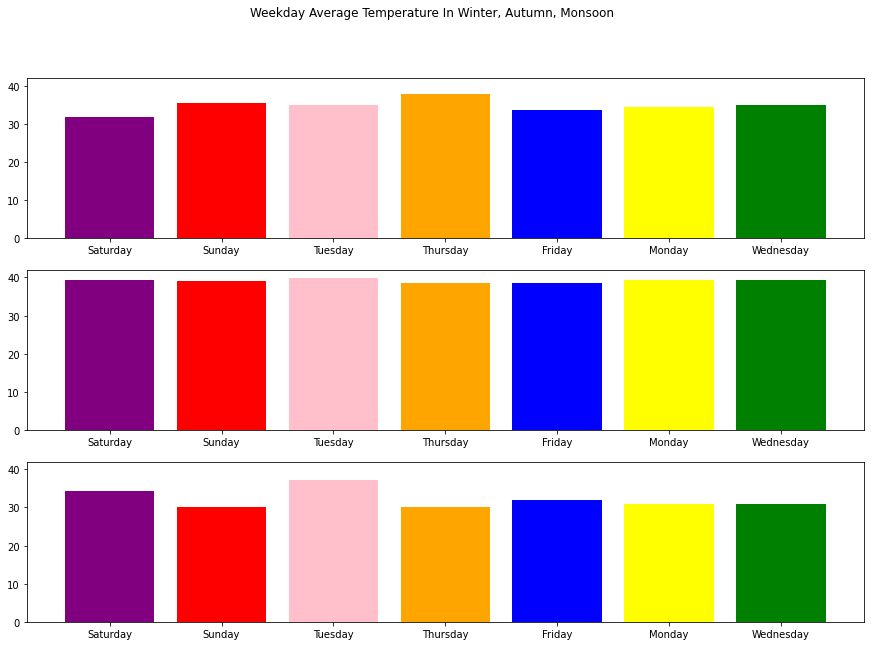

In [25]:
fig, axs = plt.subplots(3, sharey=True)
plt.rcParams["figure.figsize"] = (15,10)
fig.suptitle('Weekday Average Temperature In Winter, Autumn, Monsoon')
axs[0].bar(df['day'].unique(), df[df['season'] == 'Winter'].groupby('day')['temp'].mean(), color = ['purple','red','pink','orange','blue','yellow','green'])
axs[1].bar(df['day'].unique(), df[df['season'] == 'Autumn'].groupby('day')['temp'].mean(), color = ['purple','red','pink','orange','blue','yellow','green'])
axs[2].bar(df['day'].unique(), df[df['season'] == 'Monsoon'].groupby('day')['temp'].mean(), color = ['purple','red','pink','orange','blue','yellow','green'])
plt.show()

In [26]:
df['out/in'].value_counts()

Out    77260
In     20345
Name: out/in, dtype: int64

C:\Users\THUNYA~1\AppData\Local\Temp/ipykernel_5240/2911624921.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[df['out/in']=='Out']['temp'].loc['28-07-2018':'08-12-2018'].plot(c='orange')


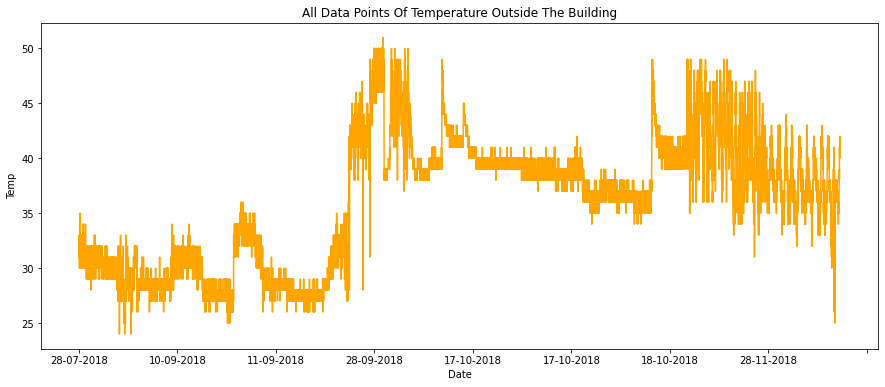

In [27]:
plt.rcParams["figure.figsize"] = (15,6)
plt.title('All Data Points Of Temperature Outside The Building')
df[df['out/in']=='Out']['temp'].loc['28-07-2018':'08-12-2018'].plot(c='orange')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.show()

C:\Users\THUNYA~1\AppData\Local\Temp/ipykernel_5240/3454312470.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[df['out/in']=='In']['temp'].loc['28-07-2018':'08-12-2018'].plot(c='purple')


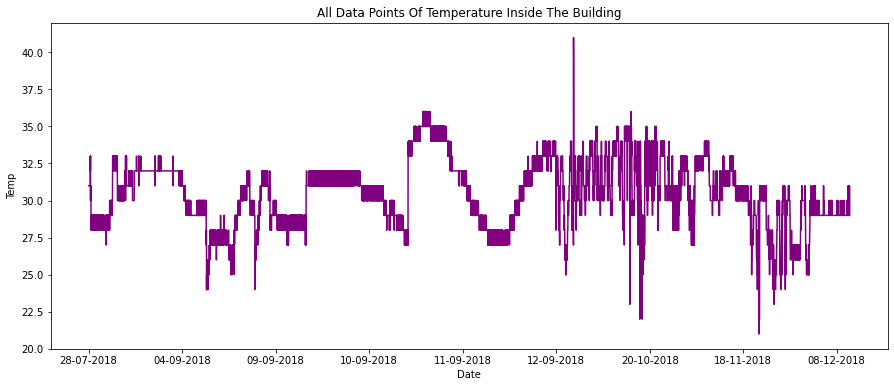

In [28]:
plt.rcParams["figure.figsize"] = (15,6)
plt.title('All Data Points Of Temperature Inside The Building')
df[df['out/in']=='In']['temp'].loc['28-07-2018':'08-12-2018'].plot(c='purple')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.show()

### Build model to forecast  future temperature using Prophet

#### create new dataframe

In [29]:
dfout = df[df['out/in']=='Out']['temp'].reset_index()
dfout['date']= pd.to_datetime(dfout['date'], format = '%d-%m-%Y')
dfout.rename(columns = {'date':'ds', 'temp':'y'}, inplace=True)

dfout.reset_index(drop=True, inplace = True)
dfout.sort_values('ds', inplace = True)
dfout

,ds,y
0,2018-07-28,32
24,2018-07-28,32
25,2018-07-28,32
26,2018-07-28,32
27,2018-07-28,31
...,...,...
77122,2018-12-08,35
77123,2018-12-08,35
77124,2018-12-08,35
77126,2018-12-08,35


#### Train/Test split

In [30]:
train = dfout[dfout['ds'] < pd.Timestamp('2018-11-23')]
train = train.groupby('ds')['y'].mean()
train = pd.DataFrame(data=train, columns=['y'])
train.reset_index(drop=False, inplace=True)
train

,ds,y
0,2018-07-28,31.790698
1,2018-07-29,31.235294
2,2018-07-31,32.400000
3,2018-08-02,32.176471
4,2018-08-10,31.115254
...,...,...
63,2018-11-18,39.490000
64,2018-11-19,38.707395
65,2018-11-20,39.483051
66,2018-11-21,41.370370


In [31]:
test = dfout[dfout['ds'] >= pd.Timestamp('2018-11-23')]
test = test.groupby('ds')['y'].mean()
test = pd.DataFrame(data=test, columns=['y'])
test.reset_index(drop=False, inplace=True)
test

,ds,y
0,2018-11-23,40.462644
1,2018-11-24,40.138824
2,2018-11-25,38.843137
3,2018-11-26,39.726351
4,2018-11-27,38.471132
5,2018-11-28,38.778401
6,2018-11-29,38.252218
7,2018-11-30,38.187097
8,2018-12-01,37.379501
9,2018-12-02,37.698765


#### fit train data into model

In [32]:
from prophet import Prophet
m = Prophet(changepoint_prior_scale=0.5)
m.fit(train)

Importing plotly failed. Interactive plots will not work.
05:35:42 - cmdstanpy - INFO - Chain [1] start processing
05:35:42 - cmdstanpy - INFO - Chain [1] done processing


#### Make a prediction and compare with our test data

In [33]:
future = m.make_future_dataframe(periods=16, freq='d', include_history = True) 

In [34]:
future

,ds
0,2018-07-28
1,2018-07-29
2,2018-07-31
3,2018-08-02
4,2018-08-10
...,...
79,2018-12-04
80,2018-12-05
81,2018-12-06
82,2018-12-07


In [35]:
forecast = m.predict(future)

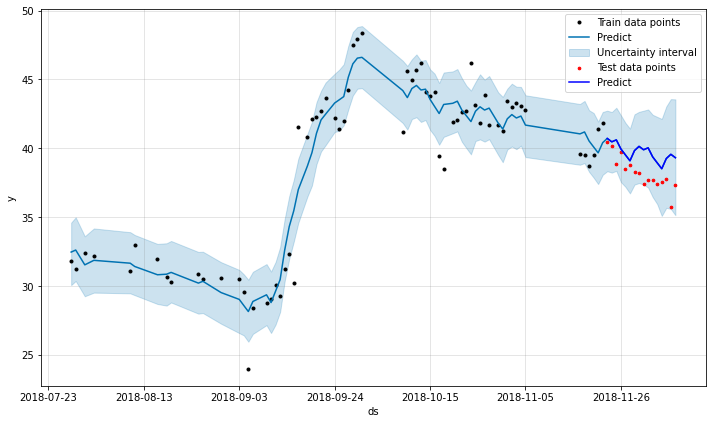

In [36]:
fig = m.plot(forecast)
plt.scatter(test['ds'] , test['y'], c='red',s=7)
plt.plot(forecast.iloc[-len(test):]['ds'], forecast.iloc[-len(test):]['yhat'], c='blue')
plt.legend(['Train data points','Predict','Uncertainty interval', 'Test data points','Predict'])
plt.show()

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-28,32.189246,30.069361,34.603679,32.189246,32.189246,0.277119,0.277119,0.277119,0.277119,0.277119,0.277119,0.0,0.0,0.0,32.466365
1,2018-07-29,32.114474,30.367566,34.989302,32.114474,32.114474,0.500219,0.500219,0.500219,0.500219,0.500219,0.500219,0.0,0.0,0.0,32.614693
2,2018-07-31,31.964928,29.258480,33.612473,31.964928,31.964928,-0.425308,-0.425308,-0.425308,-0.425308,-0.425308,-0.425308,0.0,0.0,0.0,31.539620
3,2018-08-02,31.815383,29.521189,34.182068,31.815383,31.815383,0.051880,0.051880,0.051880,0.051880,0.051880,0.051880,0.0,0.0,0.0,31.867264
4,2018-08-10,31.217203,29.469114,33.912232,31.217203,31.217203,0.441713,0.441713,0.441713,0.441713,0.441713,0.441713,0.0,0.0,0.0,31.658916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2018-12-04,39.372102,35.952122,42.284183,37.275200,41.630643,-0.425308,-0.425308,-0.425308,-0.425308,-0.425308,-0.425308,0.0,0.0,0.0,38.946793
80,2018-12-05,39.289701,35.094296,42.135050,36.888933,41.873655,-0.771121,-0.771121,-0.771121,-0.771121,-0.771121,-0.771121,0.0,0.0,0.0,38.518580
81,2018-12-06,39.207300,35.678977,43.042762,36.392988,42.140113,0.051880,0.051880,0.051880,0.051880,0.051880,0.051880,0.0,0.0,0.0,39.259180
82,2018-12-07,39.124899,35.600019,43.575723,35.979105,42.396550,0.441713,0.441713,0.441713,0.441713,0.441713,0.441713,0.0,0.0,0.0,39.566612


#### Check performance of the model with test data

In [38]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-len(test):]['yhat']
actuals = test['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 2


In [39]:
actuals.mean()

38.21355147272534

#### Check performance of the model with train data

In [40]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[:len(train)]['yhat']
actuals = train['y']

print(f"RMSE: {round(rmse(predictions, actuals))}")

RMSE: 2


In [41]:
actuals.mean()

38.61103575439874